# Analysis of Kernel Ridge Regression: Error Bound

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn import datasets
from sklearn.metrics import mean_squared_error, accuracy_score
from math import sqrt, log


## Generation of Random Data 



*   Data is generated by Gassian Distribution
*   Dataset consists of 2000 samples and 15 features



In [ ]:
X, y = datasets.make_regression(n_samples = 2000, 
                                n_features = 15,
                                n_targets = 1,  
                                shuffle=False,
                                random_state = 42
                                )
y = np.row_stack(y)
df = pd.DataFrame(np.concatenate((X, y,), axis = 1))


In [ ]:
df.rename({15:'target'}, axis = 1, inplace = True)


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,258.593855
1,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,-311.022519
2,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-71.912971
3,-0.719844,-0.460639,1.057122,0.343618,-1.763040,0.324084,-0.385082,-0.676922,0.611676,1.031000,0.931280,-0.839218,-0.309212,0.331263,0.975545,-185.568586
4,-0.479174,-0.185659,-1.106335,-1.196207,0.812526,1.356240,-0.072010,1.003533,0.361636,-0.645120,0.361396,1.538037,-0.035826,1.564644,-2.619745,-14.931370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.601834,0.512275,2.001023,1.492651,-0.639246,0.037560,-0.434825,-0.161823,-0.976434,-0.441535,0.359519,0.333122,0.253404,-0.059675,0.860742,275.765603
1996,-0.257043,1.391552,-1.847598,0.656811,0.488371,-0.674567,-0.355231,0.464791,0.915935,-1.749463,0.628246,-0.457651,1.125290,-1.839275,2.445299,89.571747
1997,-0.886140,1.429961,-0.069185,-0.818667,0.265114,1.029125,-1.552705,0.701589,-0.012178,0.577044,0.010975,-0.571869,-1.113123,0.672645,0.667272,-2.235890
1998,0.662272,0.427596,0.944699,1.406069,-1.876418,-2.341797,1.717947,-1.341047,-1.086243,-0.287614,-1.653972,-0.381587,-0.948105,-0.233341,0.279841,23.126597


## Splitting the generated data into training and train set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Training and evaluation of the model on randomly generated dataset

In [ ]:
krr = KernelRidge()
krr.fit(X_train, y_train)

y_pred = krr.predict(X_test)
e_test = (y_test, y_pred) # True error, R(h)
e_train = mean_squared_error(y_train, krr.predict(X_train)) # Empirical error, R_S(h)
print(f'Empirical error: {e_train} /n True error: {e_test}')
print(e_test-e_train)

Empirical error: 0.05428520791460904 /n True error: (array([[ 402.3790477 ],
       [ 208.95738742],
       [-137.26610944],
       [-185.56858646],
       [ 291.57679149],
       [-309.85422584],
       [ 172.11568519],
       [ -17.04571097],
       [ -29.3557887 ],
       [-204.1457056 ],
       [   4.59621229],
       [-110.79970119],
       [-252.39756051],
       [  81.22343167],
       [-462.90006767],
       [ 404.91743773],
       [-267.21094709],
       [   9.78736696],
       [-112.26590978],
       [-318.28907393],
       [-213.77128414],
       [  19.18000942],
       [   4.76916744],
       [-196.02106786],
       [   7.08353839],
       [ 190.98934812],
       [ 414.46680768],
       [  62.87541955],
       [ 184.75311602],
       [ -74.30634169],
       [ 129.41805005],
       [ -76.20641104],
       [-205.34208182],
       [  81.47191043],
       [ 185.8764103 ],
       [  39.62486254],
       [-513.08377431],
       [-266.16549189],
       [ 193.18087161],
       [ 33

### Define the function krr_res(m,d)
* generates random data with **m** and **d** parameters
* splits the data to training and test set
* evaluates the model on the test split
* returns the difference of **true error** and **empirical error**

In [ ]:
def krr_res(m, d):
  X, y = datasets.make_regression(n_samples = m, 
                                n_features = d,
                                n_targets = 1, 
                                noise = 0.2, 
                                shuffle=False,
                                random_state = 42
                                )
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  krr = KernelRidge()
  krr.fit(X_train, y_train)

  y_pred = krr.predict(X_test)
  e_test = mean_squared_error(y_test, y_pred) # True error, R(h)
  e_train = mean_squared_error(y_train, krr.predict(X_train)) # Empirical error, R_S(h)

  return abs(e_test-e_train) 

### Define the functions for computing theoretical error bound

In [ ]:
def error_bound(m,delta, M, lbd, r): # Error bound for ridge regression from Theorem 11.1 (Mohri et al., 2018)
    first_term = 4*M*sqrt((r**2*lbd**2)/m)
    second_term = M**2*sqrt(log(1/delta)/(2*m))
    return first_term + second_term

In [ ]:
def error_bound_2(m,delta, M, lbd, r, X): # Alternative error bound from Theorem 11.1 (Mohri et al., 2018)
    first_term = 4*M*lbd*sqrt(np.trace(X.T.dot(X)))
    second_term = M**2*sqrt(log(1/delta)/(2*m))
    return first_term + second_term

### Varying the parameter **m** (number of samples) for randomly generated data

In [ ]:
m_list = [i for i in range(100, 10000, 100)]

In [ ]:
E_diff = []
E_diff_const = []
E_bound = []
E_bound_const = []
for m in m_list:                # Varying the parameter m (number of samples)
  error_diff = krr_res(m, 15)   # True error - Empirical error for fixed d = 15
  e_bound = error_bound(m, 0.05, 1, 1, 1) 
  E_diff.append(error_diff)               # Test error
  E_diff_const.append(error_diff*sqrt(m)) # Test error * sqrt(m)
  E_bound_const.append(e_bound*sqrt(m))   # Theoretical error bound * sqrt(m)
  E_bound.append(e_bound)                 # Theoretical error bound

#### Comparing the experimental results versus theoretical predictions 

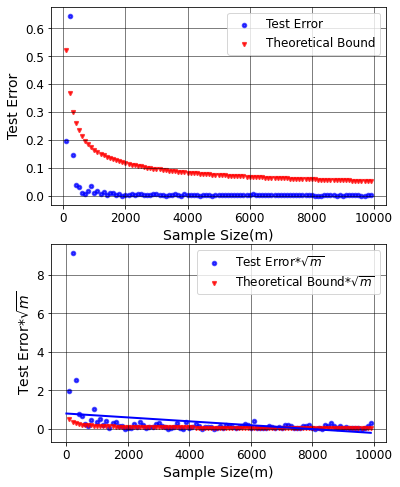

In [ ]:
figure, axis = plt.subplots(2, 1, figsize = (6,8))

axis[0].scatter(m_list, E_diff, c ="blue",
            linewidths = 2,
            marker =".",
            edgecolor ="blue",
            s = 50,
            alpha = 0.70,
            label = 'Test Error')
axis[0].scatter(m_list, E_bound, c ="red",
            linewidths = 2,
            marker ="v",
            edgecolor ="red",
            s = 10, 
            alpha = 0.75, 
            label = 'Theoretical Bound')
axis[0].legend(prop={'size': 12})
axis[0].set_xlabel('Sample Size(m)', size = 14)
axis[0].set_ylabel('Test Error', size = 14)
  

axis[1].scatter(m_list, E_diff_const, c ="blue",
            linewidths = 2,
            marker =".",
            edgecolor ="blue",
            s = 50,
            alpha = 0.70,
            label = r'Test Error*$\sqrt{m}}$')
axis[1].scatter(m_list, E_bound, c ="red",
            linewidths = 2,
            marker ="v",
            edgecolor ="red",
            s = 10, 
            alpha = 0.75, 
            label = r'Theoretical Bound*$\sqrt{m}}$')
axis[1].legend(prop={'size': 12})
axis[1].set_xlabel('Sample Size(m)', size = 14)
axis[1].set_ylabel(r'Test Error*$\sqrt{m}}$', size = 14)

model = np.poly1d(np.polyfit(m_list, E_diff_const, 1))

line = np.arange(0, 10000, 100)
axis[1].plot(line, model(line), lw = 2, c = 'blue')
for ax in axis:
    ax.tick_params(axis='x', which='both', labelsize=12)
    ax.tick_params(axis='y', which='both', labelsize=12)
    ax.grid(True, color='black', linestyle='-', linewidth=0.5)
plt.show()

### Varying the parameter **d** (number of features) for randomly generated data

In [ ]:
d_list = [i for i in range(10, 100, 1)]       
E = []
for d in d_list:                              # Varying parameter d (number of features)
  error = krr_res(2000, d)                    # True error - Empirical error for fixed m = 2000
  E.append(error/d**2)                        # Test error / d^2

#### Comparing the experimental results versus theoretical predictions

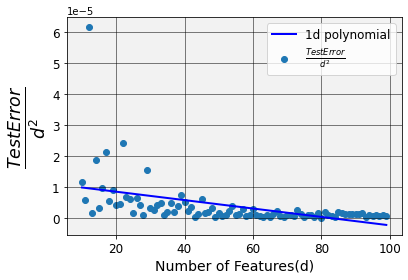

In [ ]:
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(4)

model = np.poly1d(np.polyfit(d_list, E, 1))
d_line = np.arange(10, 100, 1)
plt.plot(d_line, model(d_line), lw = 2, c = 'blue', label = '1d polynomial')

plt.scatter(d_list, E, label = r'$\frac{TestError}{d^2}}$')
plt.xlabel('Number of Features(d)', size = 14)
plt.ylabel( r'$\frac{TestError}{d^2}}$', size = 25)
plt.legend(prop = {'size': 12})
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.grid(True, color='black', linestyle='-', linewidth=0.5)
plt.gca().patch.set_facecolor('0.95')
plt.show()



## Training and evaluation of the model on real data

### Importing the Real data (California housing dataset)

In [ ]:
real_df = datasets.fetch_california_housing(as_frame=True)

In [ ]:
df = pd.DataFrame(data = real_df.data, columns = real_df.feature_names)

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
X_real, y_real = datasets.fetch_california_housing(return_X_y=True)

### Define the function real_krr_res(m,d)
* splits the real data to training and test set
* evaluates the model on the test split
* returns the difference of **true error** and **empirical error**

In [ ]:
def real_krr_res(m, d):
  X_train, X_test, y_train, y_test = train_test_split(X_real[:m,:d], np.row_stack(y_real[:m]), test_size = 0.2)
  krr = KernelRidge()
  krr.fit(X_train, y_train)

  y_pred = krr.predict(X_test)
  e_test = mean_squared_error(y_test, y_pred)
  e_train = mean_squared_error(y_train, krr.predict(X_train))

  return abs(e_test-e_train)

In [ ]:
X_real.shape

(20640, 8)

### Varying the parameter **m** (number of samples) for California housing dataset

In [ ]:
i_list =  [i for i in range(100, X_real.shape[0], 100)]

In [ ]:
E_real_diff = []
E_real_bound = []

for i in i_list:                            # Varying parameter m (number of samples)
  error_diff = real_krr_res(i, 8)           # Test error
  e_bound = error_bound(i, 0.05, 1, 1, 1)   # Theoretical error bound
  E_real_diff.append(error_diff)
  E_real_bound.append(e_bound)

#### Comparing the experimental results with theoretical predictions

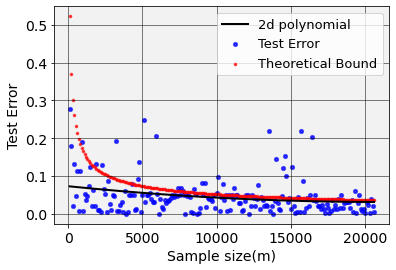

In [ ]:
plt.scatter(i_list, E_real_diff, c ="blue",
            linewidths = 2,
            marker =".",
            edgecolor ="blue",
            s = 40,
            alpha = 0.70,
            label = 'Test Error')
 
plt.scatter(i_list, E_real_bound, c ="red",
            linewidths = 2,
            marker =".",
            edgecolor ="red",
            s = 10, 
            alpha = 0.7, 
            label = 'Theoretical Bound')
            
model = np.poly1d(np.polyfit(i_list, E_real_diff, 2))

line = np.arange(100, X_real.shape[0], 100)
plt.plot(line, model(line), lw = 2,c = 'black', label = '2d polynomial')


plt.xlabel("Sample size(m)", size = 14)
plt.ylabel("Test Error", size = 14)
plt.legend(prop = {'size': 13})
plt.tick_params(axis = 'x', labelsize = 14)
plt.tick_params(axis = 'y', labelsize = 14)
plt.grid(True, color='black', linestyle='-', linewidth=0.5)
plt.gca().patch.set_facecolor('0.95')
plt.show()

### Varying the parameter **d** (number of features) for California housing dataset

In [ ]:
j_list = [j for j in [1, 2, 3, 4, 5, 6, 7, 8]]          
E_real_d= []
for j in j_list:                                      # Varying parameter d (number of features)
  error = real_krr_res(2000, j)                       # Test error
  E_real_d.append(error/j**2)                         # Test error / d^2

#### Comparing the experimental results with theoretical predictions

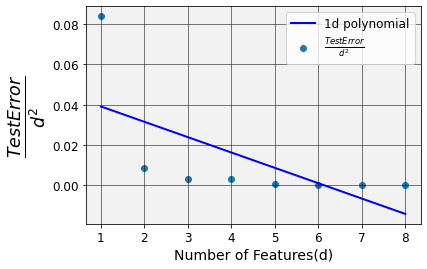

In [ ]:
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(4)

model = np.poly1d(np.polyfit(j_list, E_real_d, 1))
d_line = np.arange(1, 9, 1)
plt.plot(d_line, model(d_line), lw = 2, c = 'blue', label = '1d polynomial')

plt.scatter(j_list, E_real_d, label = r'$\frac{TestError}{d^2}}$')
plt.xlabel('Number of Features(d)', size = 14)
plt.ylabel( r'$\frac{TestError}{d^2}}$', size = 25)
plt.legend(prop = {'size': 12})
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.grid(True, color='black', linestyle='-', linewidth=0.5)
plt.gca().patch.set_facecolor('0.95')
plt.show()